In [1]:
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv("Social_network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
x = data.iloc[:,2:-1]
y = data.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [12]:
from sklearn.gaussian_process.kernels import RBF

kernel = RBF()

from sklearn.gaussian_process import GaussianProcessClassifier
clf = GaussianProcessClassifier(kernel)

clf.fit(x_train,y_train)

GaussianProcessClassifier(kernel=RBF(length_scale=1))

In [13]:
y_pred = clf.predict(x_test)

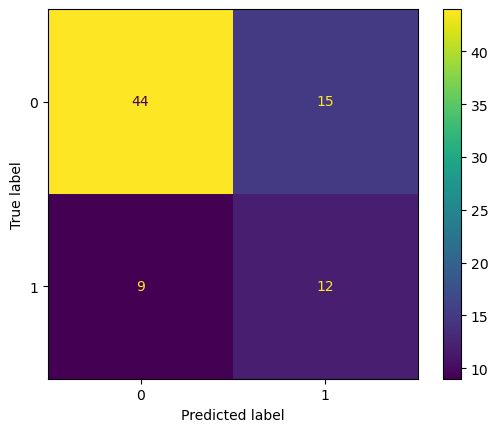

In [14]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot

cm = confusion_matrix(y_pred,y_test)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [15]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        59
           1       0.44      0.57      0.50        21

    accuracy                           0.70        80
   macro avg       0.64      0.66      0.64        80
weighted avg       0.73      0.70      0.71        80



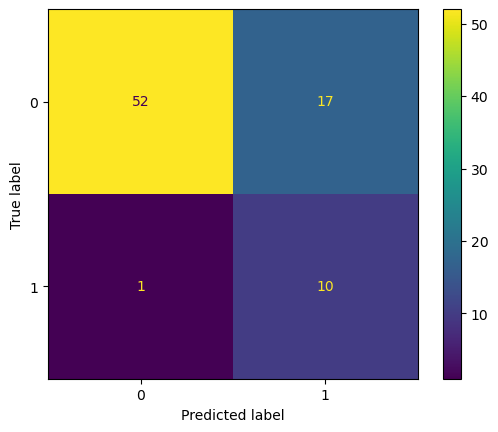

In [16]:
from sklearn.svm import SVC

clf = SVC(kernel = 'rbf')

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_pred,y_test)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()